# Data Visualization with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv("data/CustomersTransactions2021.csv")
df.head()

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category
0,1001,1,Debit,165.78,Johnny Awesome,3,ON,1,wealth
1,1001,2,Credit,42.10,Johnny Awesome,3,ON,1,wealth
2,1001,4,Credit,103.03,Johnny Awesome,3,ON,1,wealth
3,1001,5,Credit,56.60,Johnny Awesome,3,ON,1,wealth
4,1002,6,Debit,214.34,Bob Marley,4,ON,1,personal_banking


## Boxplots

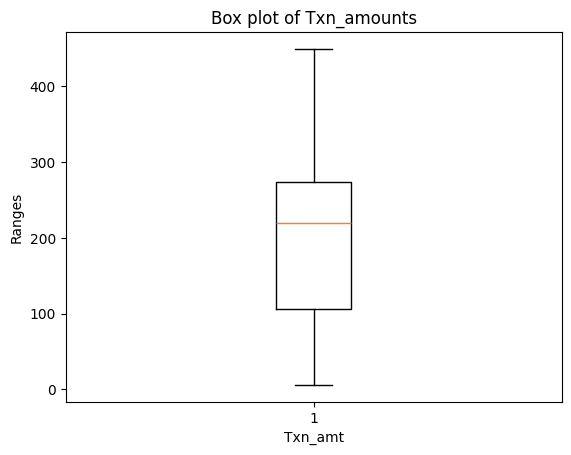

In [3]:
plt.boxplot(df["txn_total"])
plt.title("Box plot of Txn_amounts")
plt.xlabel("Txn_amt")
plt.ylabel("Ranges")
plt.show()

In [4]:
df["txn_total"].describe()

count     34.000000
mean     207.296765
std      124.283187
min        5.920000
25%      106.195000
50%      220.115000
75%      273.582500
max      449.390000
Name: txn_total, dtype: float64

## Subplots

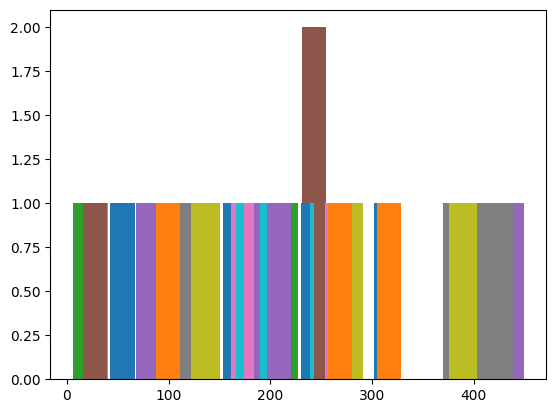

In [5]:
to_plot = list(df["Customers"].unique())

# fig = plt.subplots((len(df['Customers'].unique())//3,3))
i = 0
for plot in range(1,len(df['Customers'].unique())+1):

    plt.hist(df[df["Customers"]==to_plot[plot-1]]["txn_total"])
    


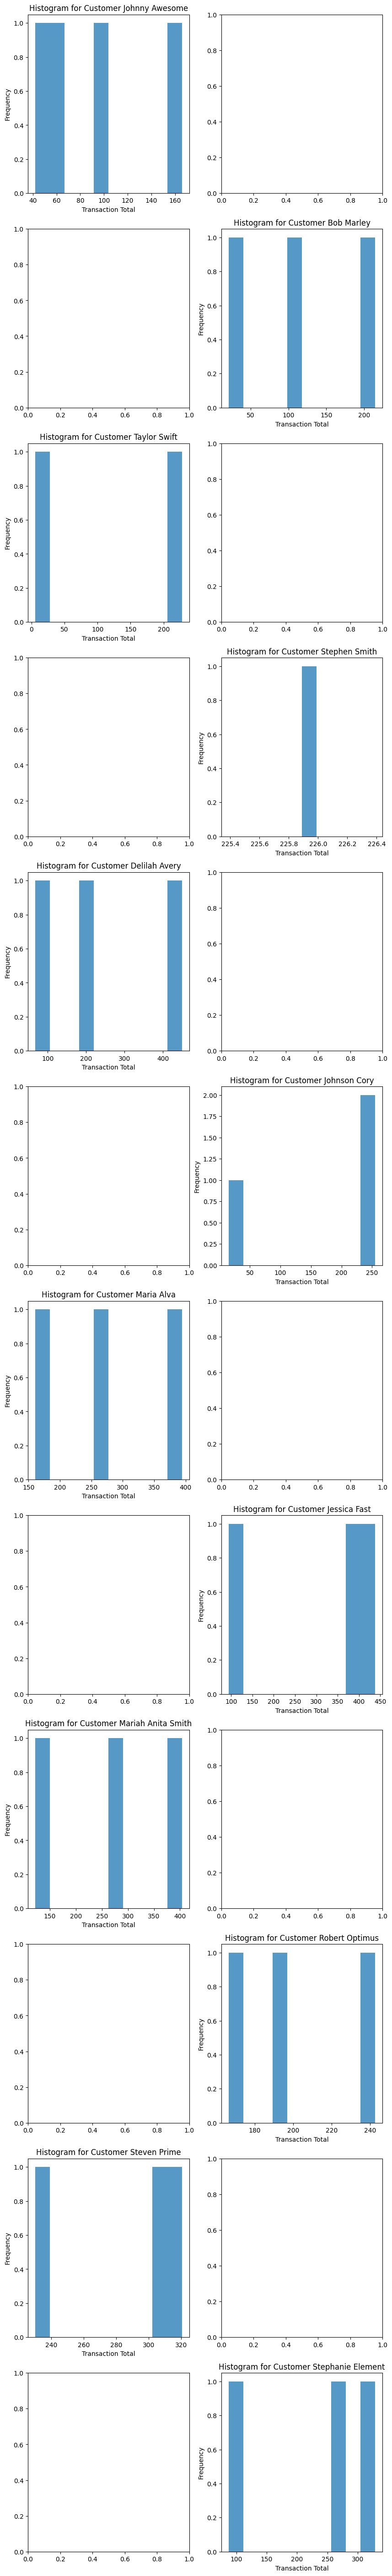

In [6]:
customers = df["Customers"].unique()

num_customers = len(customers)
fig, axs = plt.subplots(num_customers, 2, figsize=(10, 6 * num_customers))

# Plot a histogram for each customer
n = 0
for i, customer in enumerate(customers):
    if n >1:
        n=0
        
    customer_data = df[df['Customers'] == customer]['txn_total']
    axs[i][n].hist(customer_data, bins=10, alpha=0.75)
    axs[i][n].set_title(f'Histogram for Customer {customer}')
    axs[i][n].set_xlabel('Transaction Total')
    axs[i][n].set_ylabel('Frequency')
    n += 1
    

#### For each bankingCategory, find the total_amount spent in it

In [7]:
grouped_elements = pd.DataFrame(df.groupby("Category")["txn_total"].sum()).sort_values("txn_total", ascending=False).T

grouped_elements

Category,personal_banking,wealth,hnw
txn_total,3445.79,2037.46,1564.84


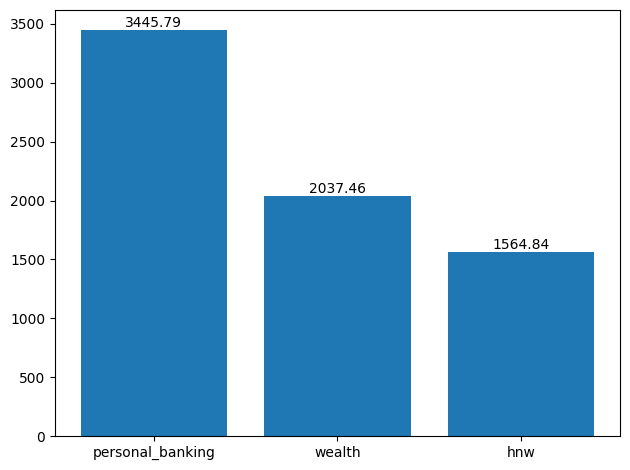

In [8]:
bars = plt.bar(x=grouped_elements.columns, height = grouped_elements.iloc[0])

plt.bar_label(bars)

plt.tight_layout()
plt.show()

<Axes: xlabel='Category'>

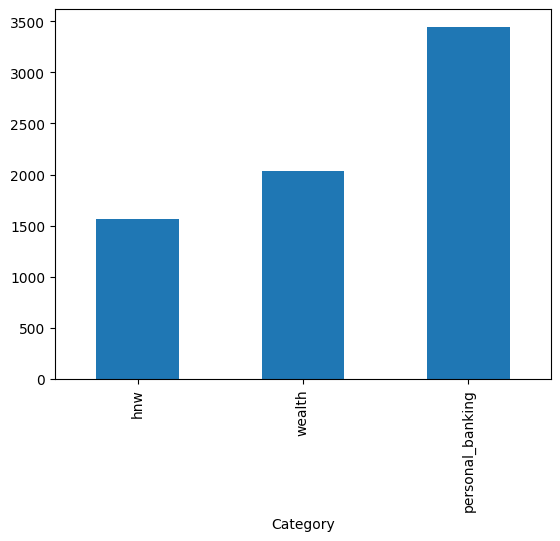

In [9]:
df.groupby("Category")["txn_total"].sum().sort_values().plot(kind="bar")

### For each banking category, find the total amount paid via each payment_method

In [10]:
double_grouped =df.groupby(["Category", "txn_type"]).aggregate({"txn_total":"sum"}).unstack("txn_type")
double_grouped

txn_total                 
txn_type              Cash  Credit    Debit
Category                                   
hnw                 652.01  451.15   461.68
personal_banking    961.75  815.55  1668.49
wealth              391.13  595.64  1050.69

<Axes: xlabel='Category'>

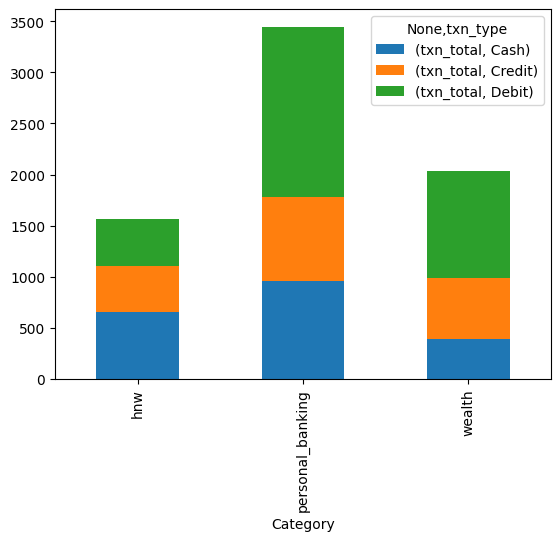

In [11]:

double_grouped.plot(kind="bar", stacked=True)

<BarContainer object of 4 artists>

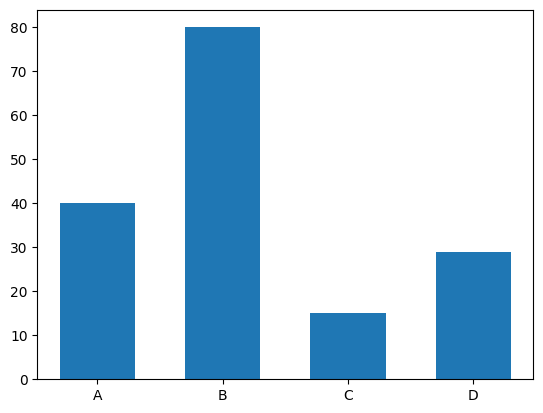

In [13]:
plt.bar(['A','B','C','D'],[40,80,15,29], width=0.6)

<BarContainer object of 4 artists>

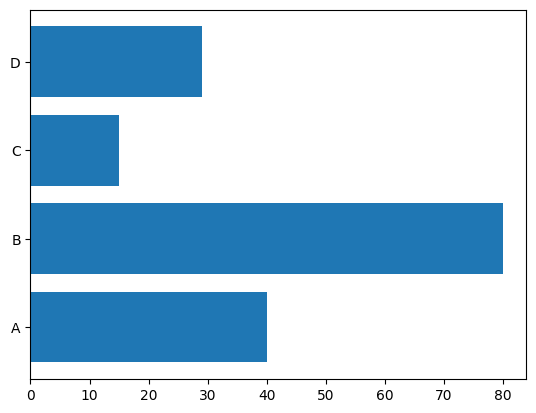

In [15]:
# horizontal 
plt.barh(['A','B','C','D'],[40,80,15,29])

**Grouped Bar**

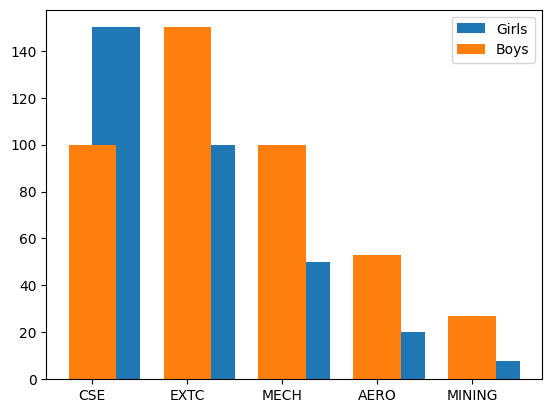

In [18]:
import numpy as np

course_list = ["CSE", "EXTC", "MECH", "AERO", "MINING"]
barIndexes_alongXaxis = np.arange(len(course_list))

girlsCount_barHeights = [150,100,50,20,8]
boysCount_barHeights = [100,150,100,53,27]


plt.bar(barIndexes_alongXaxis, girlsCount_barHeights, width=0.5, align="edge", label="Girls")
plt.bar(barIndexes_alongXaxis, boysCount_barHeights, width=0.5, align="center", label="Boys")
plt.xticks(ticks=barIndexes_alongXaxis, labels=course_list)
plt.legend()
plt.show()